https://www.youtube.com/watch?v=_drqJ9SFCgU&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&index=2

supervised learning . where tag a labeled data set is needed . make a model based on given both input and output values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data=pd.read_csv("D:/data/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price(lakhs)
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape
#shows totals rows and columns

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].count()
#grouping area_type and its total number

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data=data.drop(['area_type','availability','balcony','society'],axis='columns')
#Removing columns

In [6]:
data.head()

,location,size,total_sqft,bath,price(lakhs)
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## finding NaN values and Removing

In [7]:
data.isnull().sum()

location         1
size            16
total_sqft       0
bath            73
price(lakhs)     0
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
price(lakhs)    0
dtype: int64

In [10]:
data.head(2)

,location,size,total_sqft,bath,price(lakhs)
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


# handling size column in data set

In [11]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
def get_room(room):
    return room.split(' ')[0]

data['bhk']=data['size'].apply(lambda x: int(get_room(x)) )

In [13]:
data=data.drop(['size'],axis=1)

In [14]:
data.head(3)

,location,total_sqft,bath,price(lakhs),bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3


# Handling total_sqft colummns

convert total_sqft in float

In [15]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
data[~data['total_sqft'].apply(isFloat )].head()
#  ~  negate operation

,location,total_sqft,bath,price(lakhs),bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


convert

In [17]:
data.isnull().sum()

location        0
total_sqft      0
bath            0
price(lakhs)    0
bhk             0
dtype: int64

In [18]:
def convert_total_sqft_range_in_float(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
data1=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_total_sqft_range_in_float)
data.head()

,location,total_sqft,bath,price(lakhs),bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [20]:
#data.loc[30]
data.isnull().sum()

location         0
total_sqft      46
bath             0
price(lakhs)     0
bhk              0
dtype: int64

In [21]:
data=data.dropna()

In [22]:
data.isnull().sum()

location        0
total_sqft      0
bath            0
price(lakhs)    0
bhk             0
dtype: int64

### price per sqft

In [23]:
data['price_per_sqft']=(data['price(lakhs)']*100000)/data['total_sqft']

In [24]:
data.head()

,location,total_sqft,bath,price(lakhs),bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [25]:

len(data['location'].unique())

1298

## manage location

In [26]:
data.location=data.location.apply(lambda x: x.strip())

In [27]:
# locations_status=data.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_status=data.groupby('location')['location'].count().sort_values(ascending=False)
locations_status

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [28]:
locations_status_lessthen10=locations_status[locations_status<=10]
locations_status_lessthen10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [29]:
data.location=data.location.apply(lambda x: 'other' if x in locations_status_lessthen10 else x)
#renaming location to other for those location which are less then and equal to 10 are available

In [30]:
len(data.location.unique())

241

# Remove rooms 

In [31]:
#average room sqft  is around 300 per bedroom if room are less then 300sqft they are removed
data[data.total_sqft/data.bhk<300]

,location,total_sqft,bath,price(lakhs),bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [32]:
data=data[~(data.total_sqft/data.bhk<300)]

In [33]:
data.shape
#it show total no of rows and columns

(12456, 6)

## managing price

In [34]:
data['price_per_sqft'].describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outline(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [36]:
data2=remove_pps_outline(data)
data2.head(10)

,location,total_sqft,bath,price(lakhs),bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667


In [37]:
data2.price_per_sqft.sort_values(ascending=False)

2524    24509.803922
2522    24166.666667
1710    24000.000000
1701    23719.165085
1702    22296.774194
            ...     
9439     1600.000000
9669     1495.513460
8677     1379.310345
8643     1300.000000
8373     1250.000000
Name: price_per_sqft, Length: 10242, dtype: float64

In [38]:
data.isnull().sum()

location          0
total_sqft        0
bath              0
price(lakhs)      0
bhk               0
price_per_sqft    0
dtype: int64

# visual

In [39]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    #matplotlib.rcParams['figure','figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2['price(lakhs)'],color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3['price(lakhs)'],color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()
    

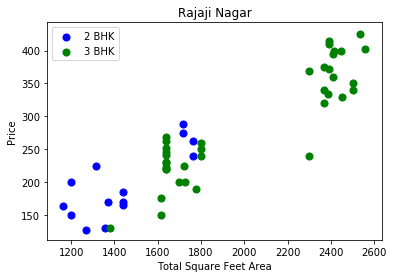

In [40]:
plot_scatter_chart(data2,'Rajaji Nagar')

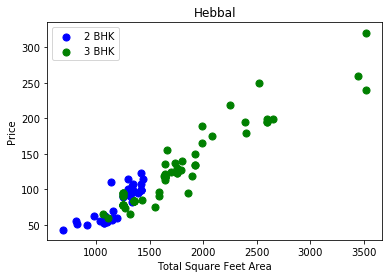

In [41]:
plot_scatter_chart(data2,'Hebbal')

we should also remove properties where for some location, the price of (for example) 3bedroom apartment is less than 2 bedroom apartment (with the same square  ft area). what we will do is for a given location, we will build  a dictionary of stats per bhk



now we can remove thhose 2bhk apartments whose price per sqft is less than price per sqft of 1bhk apartment
 

In [42]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [43]:
data3=remove_bhk_outliers(data2)
data3

,location,total_sqft,bath,price(lakhs),bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,5833.333333
10234,other,1800.0,1.0,200.0,1,11111.111111
10237,other,1353.0,2.0,110.0,2,8130.081301
10238,other,812.0,1.0,26.0,1,3201.970443


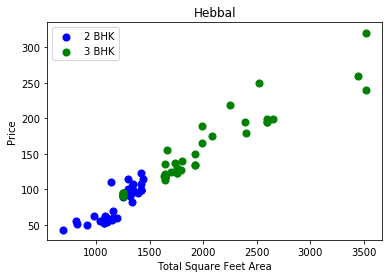

In [44]:
plot_scatter_chart(data3,'Hebbal')

Text(0, 0.5, 'count')

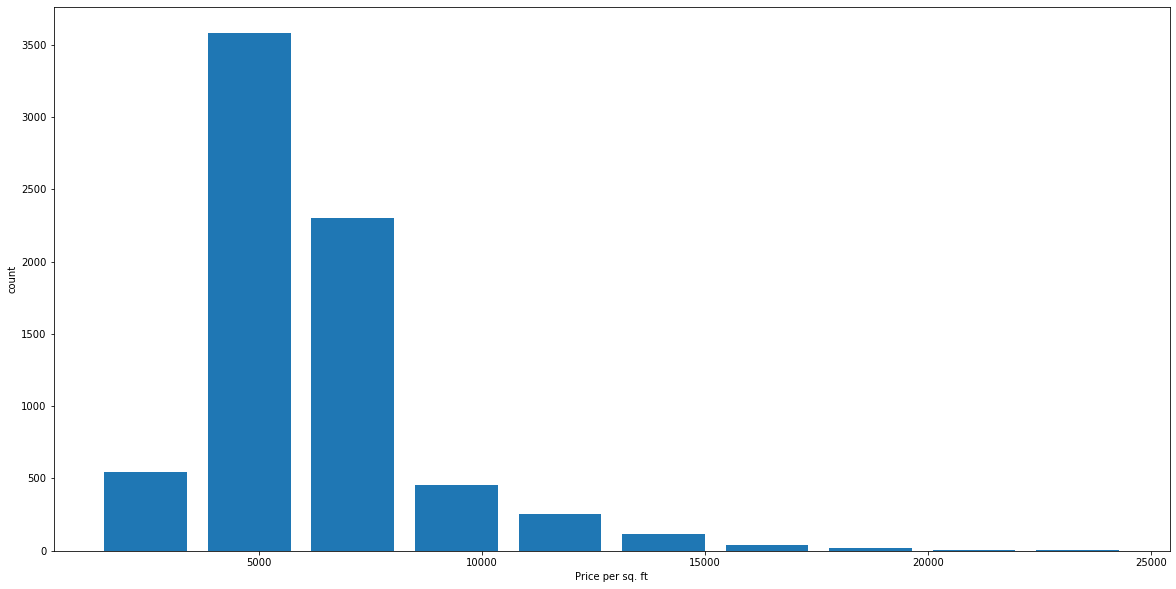

In [45]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(data3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sq. ft")
plt.ylabel('count')


# bath Room

In [46]:
data3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
data3[data3.bath>10]

,location,total_sqft,bath,price(lakhs),bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8483,other,12000.0,12.0,525.0,10,4375.000000
8572,other,10000.0,16.0,550.0,16,5500.000000
9306,other,6000.0,12.0,150.0,11,2500.000000
9637,other,5425.0,13.0,275.0,13,5069.124424


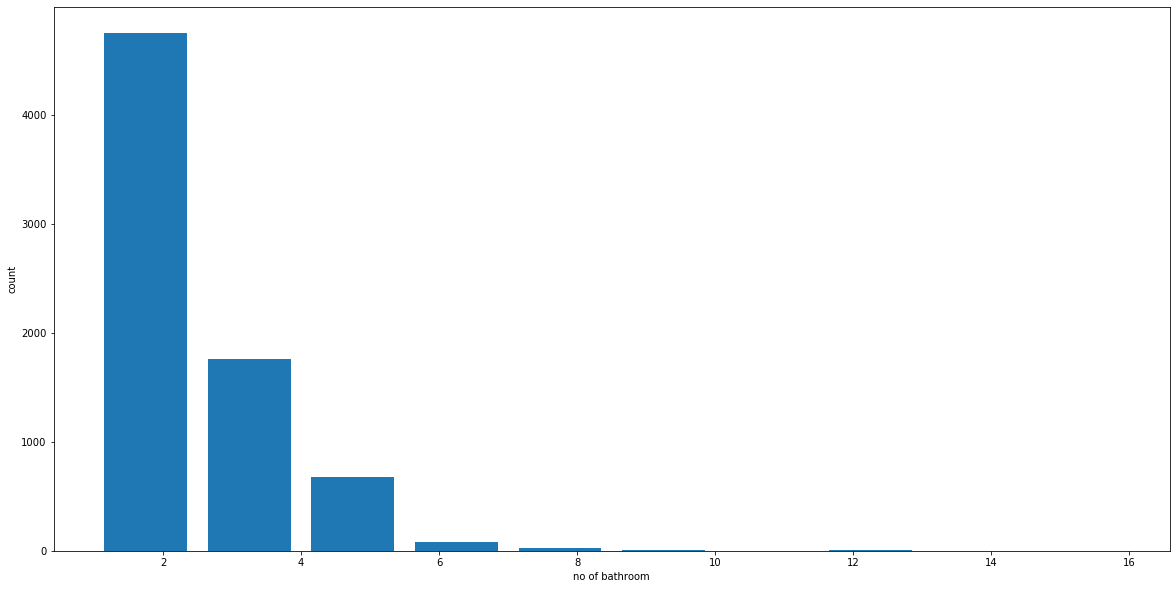

In [48]:
plt.hist(data3.bath,rwidth=0.8)
plt.xlabel('no of bathroom')
plt.ylabel("count")
plt.show()

In [49]:
data3[data3.bath>(data3.bhk+2)]

,location,total_sqft,bath,price(lakhs),bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8408,other,11338.0,9.0,1000.0,6,8819.897689


In [50]:
data4=data3[data3.bath<(data3.bhk+2)]
data4.shape

(7239, 6)

In [51]:
data5=data4.drop(['price_per_sqft'],axis=1)

In [52]:
data5.head()

,location,total_sqft,bath,price(lakhs),bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# MODEL BUILDING

In [53]:
dummies=pd.get_dummies(data5.location)
dummies.head()
#to convert the string data into numeric

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data6=pd.concat([data5,dummies.drop('other',axis=1)],axis=1)
data6.head()

,location,total_sqft,bath,price(lakhs),bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data7=data6.drop('location',axis='columns')
data7.head()

,total_sqft,bath,price(lakhs),bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data7.shape

(7239, 244)

In [57]:
x=data7.drop('price(lakhs)',axis=1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y=data7['price(lakhs)']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price(lakhs), dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8629132245229447

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#k4 cross validation tutorial
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regressiion':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lesso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regressiion,0.847796,{'normalize': False}
1,lesso,0.726738,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.720027,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [63]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [64]:
def predict_price(location, sqft, bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    xx=np.zeros(len(x.columns))
    xx[0]=sqft
    xx[1]=bath
    xx[2]=bhk
    if loc_index >= 0:
        xx[loc_index] = 1
    
    return lr_clf.predict([xx])[0]

In [65]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.86570258311492

In [69]:
predict_price('1st Phase JP Nagar',1000,4,4)

88.2955431166104

In [71]:
predict_price('Indira Nagar',1000,4,4)

197.74181786529203

In [72]:
predict_price('Indira Nagar',1000,2,2)

193.31197733179653

In [74]:
predict_price('Indira Nagar',1000,3,3)

195.52689759854428

#### export models

In [75]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [76]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))